# Where did people tweet about Covid?

In [2]:
import pandas as pd
import numpy as np
import json
import sys
import string
import re
from collections import Counter
import altair as alt
import plotly.graph_objects as go
from geopy.geocoders import Nominatim
import plotly.express as px

### If you are in a rush, go directly to the last cell and run it. You'll se the final result anyway (check if the file called mappa.csv is in the same directory as this notebook)

We're going to use only the **general dataset** because the **fake dataset** was to small to get a meaningul chart.

In [2]:
data = []
with open('dataset/general_result_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

Since not a lot of tweets had the exact location enabled, we've used a geocoding API to get it

In [3]:
index=0
lati = []
longi = []
texto = []
both = []
counter = []
locator = Nominatim(user_agent="myGeocoder")
for element in data: 
    #print(index)
    if data[index]['place'] is not None:#se c'è coordinates c'è anche place
        location = locator.geocode(data[index]['place']['full_name'])
        if location is not None:
            both.append(str(location.longitude)+" "+str(location.latitude) + " "+location.address.replace(" ","."))
    index=index+1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070


3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722


5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394


6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013
7014
7015
7016
7017
7018
7019
7020
7021
7022
7023
7024
7025
7026
7027
7028
7029
7030
7031
7032
7033
7034
7035
7036
7037
7038
7039
7040
7041
7042
7043
7044
7045
7046
7047
7048
7049
7050
7051
7052
7053
7054
7055
7056
7057
7058
7059
7060
7061
7062
7063
7064
7065
7066


8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637
8638
8639
8640
8641
8642
8643
8644
8645
8646
8647
8648
8649
8650
8651
8652
8653
8654
8655
8656
8657
8658
8659
8660
8661
8662
8663
8664
8665
8666
8667
8668
8669
8670
8671
8672
8673
8674
8675
8676
8677
8678
8679
8680
8681
8682
8683
8684
8685
8686
8687
8688
8689
8690
8691
8692
8693
8694
8695
8696
8697
8698
8699
8700
8701
8702
8703
8704
8705
8706
8707
8708
8709
8710
8711
8712
8713
8714
8715
8716
8717
8718
8719
8720
8721
8722
8723
8724
8725
8726
8727
8728
8729
8730
8731
8732
8733
8734
8735
8736
8737
8738
8739
8740
8741
8742
8743
8744
8745
8746
8747
8748
8749
8750
8751
8752
8753
8754
8755
8756
8757
8758
8759
8760
8761
8762
8763
8764
8765
8766
8767
8768
8769
8770
8771
8772
8773
8774
8775
8776
8777
8778
8779
8780
8781
8782
8783
8784
8785
8786
8787
8788
8789
8790
8791
8792
8793
8794
8795
8796
8797
8798
8799
8800
8801
8802
8803
8804


10258
10259
10260
10261
10262
10263
10264
10265
10266
10267
10268
10269
10270
10271
10272
10273
10274
10275
10276
10277
10278
10279
10280
10281
10282
10283
10284
10285
10286
10287
10288
10289
10290
10291
10292
10293
10294
10295
10296
10297
10298
10299
10300
10301
10302
10303
10304
10305
10306
10307
10308
10309
10310
10311
10312
10313
10314
10315
10316
10317
10318
10319
10320
10321
10322
10323
10324
10325
10326
10327
10328
10329
10330
10331
10332
10333
10334
10335
10336
10337
10338
10339
10340
10341
10342
10343
10344
10345
10346
10347
10348
10349
10350
10351
10352
10353
10354
10355
10356
10357
10358
10359
10360
10361
10362
10363
10364
10365
10366
10367
10368
10369
10370
10371
10372
10373
10374
10375
10376
10377
10378
10379
10380
10381
10382
10383
10384
10385
10386
10387
10388
10389
10390
10391
10392
10393
10394
10395
10396
10397
10398
10399
10400
10401
10402
10403
10404
10405
10406
10407
10408
10409
10410
10411
10412
10413
10414
10415
10416
10417
10418
10419
10420
10421
10422
10423
1042

11661
11662
11663
11664
11665
11666
11667
11668
11669
11670
11671
11672
11673
11674
11675
11676
11677
11678
11679
11680
11681
11682
11683
11684
11685
11686
11687
11688
11689
11690
11691
11692
11693
11694
11695
11696
11697
11698
11699
11700
11701
11702
11703
11704
11705
11706
11707
11708
11709
11710
11711
11712
11713
11714
11715
11716
11717
11718
11719
11720
11721
11722
11723
11724
11725
11726
11727
11728
11729
11730
11731
11732
11733
11734
11735
11736
11737
11738
11739
11740
11741
11742
11743
11744
11745
11746
11747
11748
11749
11750
11751
11752
11753
11754
11755
11756
11757
11758
11759
11760
11761
11762
11763
11764
11765
11766
11767
11768
11769
11770
11771
11772
11773
11774
11775
11776
11777
11778
11779
11780
11781
11782
11783
11784
11785
11786
11787
11788
11789
11790
11791
11792
11793
11794
11795
11796
11797
11798
11799
11800
11801
11802
11803
11804
11805
11806
11807
11808
11809
11810
11811
11812
11813
11814
11815
11816
11817
11818
11819
11820
11821
11822
11823
11824
11825
11826
1182

13077
13078
13079
13080
13081
13082
13083
13084
13085
13086
13087
13088
13089
13090
13091
13092
13093
13094
13095
13096
13097
13098
13099
13100
13101
13102
13103
13104
13105
13106
13107
13108
13109
13110
13111
13112
13113
13114
13115
13116
13117
13118
13119
13120
13121
13122
13123
13124
13125
13126
13127
13128
13129
13130
13131
13132
13133
13134
13135
13136
13137
13138
13139
13140
13141
13142
13143
13144
13145
13146
13147
13148
13149
13150
13151
13152
13153
13154
13155
13156
13157
13158
13159
13160
13161
13162
13163
13164
13165
13166
13167
13168
13169
13170
13171
13172
13173
13174
13175
13176
13177
13178
13179
13180
13181
13182
13183
13184
13185
13186
13187
13188
13189
13190
13191
13192
13193
13194
13195
13196
13197
13198
13199
13200
13201
13202
13203
13204
13205
13206
13207
13208
13209
13210
13211
13212
13213
13214
13215
13216
13217
13218
13219
13220
13221
13222
13223
13224
13225
13226
13227
13228
13229
13230
13231
13232
13233
13234
13235
13236
13237
13238
13239
13240
13241
13242
1324

14510
14511
14512
14513
14514
14515
14516
14517
14518
14519
14520
14521
14522
14523
14524
14525
14526
14527
14528
14529
14530
14531
14532
14533
14534
14535
14536
14537
14538
14539
14540
14541
14542
14543
14544
14545
14546
14547
14548
14549
14550
14551
14552
14553
14554
14555
14556
14557
14558
14559
14560
14561
14562
14563
14564
14565
14566
14567
14568
14569
14570
14571
14572
14573
14574
14575
14576
14577
14578
14579
14580
14581
14582
14583
14584
14585
14586
14587
14588
14589
14590
14591
14592
14593
14594
14595
14596
14597
14598
14599
14600
14601
14602
14603
14604
14605
14606
14607
14608
14609
14610
14611
14612
14613
14614
14615
14616
14617
14618
14619
14620
14621
14622
14623
14624
14625
14626
14627
14628
14629
14630
14631
14632
14633
14634
14635
14636
14637
14638
14639
14640
14641
14642
14643
14644
14645
14646
14647
14648
14649
14650
14651
14652
14653
14654
14655
14656
14657
14658
14659
14660
14661
14662
14663
14664
14665
14666
14667
14668
14669
14670
14671
14672
14673
14674
14675
1467

15881
15882
15883
15884
15885
15886
15887
15888
15889
15890
15891
15892
15893
15894
15895
15896
15897
15898
15899
15900
15901
15902
15903
15904
15905
15906
15907
15908
15909
15910
15911
15912
15913
15914
15915
15916
15917
15918
15919
15920
15921
15922
15923
15924
15925
15926
15927
15928
15929
15930
15931
15932
15933
15934
15935
15936
15937
15938
15939
15940
15941
15942
15943
15944
15945
15946
15947
15948
15949
15950
15951
15952
15953
15954
15955
15956
15957
15958
15959
15960
15961
15962
15963
15964
15965
15966
15967
15968
15969
15970
15971
15972
15973
15974
15975
15976
15977
15978
15979
15980
15981
15982
15983
15984
15985
15986
15987
15988
15989
15990
15991
15992
15993
15994
15995
15996
15997
15998
15999
16000
16001
16002
16003
16004
16005
16006
16007
16008
16009
16010
16011
16012
16013
16014
16015
16016
16017
16018
16019
16020
16021
16022
16023
16024
16025
16026
16027
16028
16029
16030
16031
16032
16033
16034
16035
16036
16037
16038
16039
16040
16041
16042
16043
16044
16045
16046
1604

17255
17256
17257
17258
17259
17260
17261
17262
17263
17264
17265
17266
17267
17268
17269
17270
17271
17272
17273
17274
17275
17276
17277
17278
17279
17280
17281
17282
17283
17284
17285
17286
17287
17288
17289
17290
17291
17292
17293
17294
17295
17296
17297
17298
17299
17300
17301
17302
17303
17304
17305
17306
17307
17308
17309
17310
17311
17312
17313
17314
17315
17316
17317
17318
17319
17320
17321
17322
17323
17324
17325
17326
17327
17328
17329
17330
17331
17332
17333
17334
17335
17336
17337
17338
17339
17340
17341
17342
17343
17344
17345
17346
17347
17348
17349
17350
17351
17352
17353
17354
17355
17356
17357
17358
17359
17360
17361
17362
17363
17364
17365
17366
17367
17368
17369
17370
17371
17372
17373
17374
17375
17376
17377
17378
17379
17380
17381
17382
17383
17384
17385
17386
17387
17388
17389
17390
17391
17392
17393
17394
17395
17396
17397
17398
17399
17400
17401
17402
17403
17404
17405
17406
17407
17408
17409
17410
17411
17412
17413
17414
17415
17416
17417
17418
17419
17420
1742

18622
18623
18624
18625
18626
18627
18628
18629
18630
18631
18632
18633
18634
18635
18636
18637
18638
18639
18640
18641
18642
18643
18644
18645
18646
18647
18648
18649
18650
18651
18652
18653
18654
18655
18656
18657
18658
18659
18660
18661
18662
18663
18664
18665
18666
18667
18668
18669
18670
18671
18672
18673
18674
18675
18676
18677
18678
18679
18680
18681
18682
18683
18684
18685
18686
18687
18688
18689
18690
18691
18692
18693
18694
18695
18696
18697
18698
18699
18700
18701
18702
18703
18704
18705
18706
18707
18708
18709
18710
18711
18712
18713
18714
18715
18716
18717
18718
18719
18720
18721
18722
18723
18724
18725
18726
18727
18728
18729
18730
18731
18732
18733
18734
18735
18736
18737
18738
18739
18740
18741
18742
18743
18744
18745
18746
18747
18748
18749
18750
18751
18752
18753
18754
18755
18756
18757
18758
18759
18760
18761
18762
18763
18764
18765
18766
18767
18768
18769
18770
18771
18772
18773
18774
18775
18776
18777
18778
18779
18780
18781
18782
18783
18784
18785
18786
18787
1878

19994
19995
19996
19997
19998
19999
20000
20001
20002
20003
20004
20005
20006
20007
20008
20009
20010
20011
20012
20013
20014
20015
20016
20017
20018
20019
20020
20021
20022
20023
20024
20025
20026
20027
20028
20029
20030
20031
20032
20033
20034
20035
20036
20037
20038
20039
20040
20041
20042
20043
20044
20045
20046
20047
20048
20049
20050
20051
20052
20053
20054
20055
20056
20057
20058
20059
20060
20061
20062
20063
20064
20065
20066
20067
20068
20069
20070
20071
20072
20073
20074
20075
20076
20077
20078
20079
20080
20081
20082
20083
20084
20085
20086
20087
20088
20089
20090
20091
20092
20093
20094
20095
20096
20097
20098
20099
20100
20101
20102
20103
20104
20105
20106
20107
20108
20109
20110
20111
20112
20113
20114
20115
20116
20117
20118
20119
20120
20121
20122
20123
20124
20125
20126
20127
20128
20129
20130
20131
20132
20133
20134
20135
20136
20137
20138
20139
20140
20141
20142
20143
20144
20145
20146
20147
20148
20149
20150
20151
20152
20153
20154
20155
20156
20157
20158
20159
2016

21392
21393
21394
21395
21396
21397
21398
21399
21400
21401
21402
21403
21404
21405
21406
21407
21408
21409
21410
21411
21412
21413
21414
21415
21416
21417
21418
21419
21420
21421
21422
21423
21424
21425
21426
21427
21428
21429
21430
21431
21432
21433
21434
21435
21436
21437
21438
21439
21440
21441
21442
21443
21444
21445
21446
21447
21448
21449
21450
21451
21452
21453
21454
21455
21456
21457
21458
21459
21460
21461
21462
21463
21464
21465
21466
21467
21468
21469
21470
21471
21472
21473
21474
21475
21476
21477
21478
21479
21480
21481
21482
21483
21484
21485
21486
21487
21488
21489
21490
21491
21492
21493
21494
21495
21496
21497
21498
21499
21500
21501
21502
21503
21504
21505
21506
21507
21508
21509
21510
21511
21512
21513
21514
21515
21516
21517
21518
21519
21520
21521
21522
21523
21524
21525
21526
21527
21528
21529
21530
21531
21532
21533
21534
21535
21536
21537
21538
21539
21540
21541
21542
21543
21544
21545
21546
21547
21548
21549
21550
21551
21552
21553
21554
21555
21556
21557
2155

22760
22761
22762
22763
22764
22765
22766
22767
22768
22769
22770
22771
22772
22773
22774
22775
22776
22777
22778
22779
22780
22781
22782
22783
22784
22785
22786
22787
22788
22789
22790
22791
22792
22793
22794
22795
22796
22797
22798
22799
22800
22801
22802
22803
22804
22805
22806
22807
22808
22809
22810
22811
22812
22813
22814
22815
22816
22817
22818
22819
22820
22821
22822
22823
22824
22825
22826
22827
22828
22829
22830
22831
22832
22833
22834
22835
22836
22837
22838
22839
22840
22841
22842
22843
22844
22845
22846
22847
22848
22849
22850
22851
22852
22853
22854
22855
22856
22857
22858
22859
22860
22861
22862
22863
22864
22865
22866
22867
22868
22869
22870
22871
22872
22873
22874
22875
22876
22877
22878
22879
22880
22881
22882
22883
22884
22885
22886
22887
22888
22889
22890
22891
22892
22893
22894
22895
22896
22897
22898
22899
22900
22901
22902
22903
22904
22905
22906
22907
22908
22909
22910
22911
22912
22913
22914
22915
22916
22917
22918
22919
22920
22921
22922
22923
22924
22925
2292

24169
24170
24171
24172
24173
24174
24175
24176
24177
24178
24179
24180
24181
24182
24183
24184
24185
24186
24187
24188
24189
24190
24191
24192
24193
24194
24195
24196
24197
24198
24199
24200
24201
24202
24203
24204
24205
24206
24207
24208
24209
24210
24211
24212
24213
24214
24215
24216
24217
24218
24219
24220
24221
24222
24223
24224
24225
24226
24227
24228
24229
24230
24231
24232
24233
24234
24235
24236
24237
24238
24239
24240
24241
24242
24243
24244
24245
24246
24247
24248
24249
24250
24251
24252
24253
24254
24255
24256
24257
24258
24259
24260
24261
24262
24263
24264
24265
24266
24267
24268
24269
24270
24271
24272
24273
24274
24275
24276
24277
24278
24279
24280
24281
24282
24283
24284
24285
24286
24287
24288
24289
24290
24291
24292
24293
24294
24295
24296
24297
24298
24299
24300
24301
24302
24303
24304
24305
24306
24307
24308
24309
24310
24311
24312
24313
24314
24315
24316
24317
24318
24319
24320
24321
24322
24323
24324
24325
24326
24327
24328
24329
24330
24331
24332
24333
24334
2433

25562
25563
25564
25565
25566
25567
25568
25569
25570
25571
25572
25573
25574
25575
25576
25577
25578
25579
25580
25581
25582
25583
25584
25585
25586
25587
25588
25589
25590
25591
25592
25593
25594
25595
25596
25597
25598
25599
25600
25601
25602
25603
25604
25605
25606
25607
25608
25609
25610
25611
25612
25613
25614
25615
25616
25617
25618
25619
25620
25621
25622
25623
25624
25625
25626
25627
25628
25629
25630
25631
25632
25633
25634
25635
25636
25637
25638
25639
25640
25641
25642
25643
25644
25645
25646
25647
25648
25649
25650
25651
25652
25653
25654
25655
25656
25657
25658
25659
25660
25661
25662
25663
25664
25665
25666
25667
25668
25669
25670
25671
25672
25673
25674
25675
25676
25677
25678
25679
25680
25681
25682
25683
25684
25685
25686
25687
25688
25689
25690
25691
25692
25693
25694
25695
25696
25697
25698
25699
25700
25701
25702
25703
25704
25705
25706
25707
25708
25709
25710
25711
25712
25713
25714
25715
25716
25717
25718
25719
25720
25721
25722
25723
25724
25725
25726
25727
2572

26931
26932
26933
26934
26935
26936
26937
26938
26939
26940
26941
26942
26943
26944
26945
26946
26947
26948
26949
26950
26951
26952
26953
26954
26955
26956
26957
26958
26959
26960
26961
26962
26963
26964
26965
26966
26967
26968
26969
26970
26971
26972
26973
26974
26975
26976
26977
26978
26979
26980
26981
26982
26983
26984
26985
26986
26987
26988
26989
26990
26991
26992
26993
26994
26995
26996
26997
26998
26999
27000
27001
27002
27003
27004
27005
27006
27007
27008
27009
27010
27011
27012
27013
27014
27015
27016
27017
27018
27019
27020
27021
27022
27023
27024
27025
27026
27027
27028
27029
27030
27031
27032
27033
27034
27035
27036
27037
27038
27039
27040
27041
27042
27043
27044
27045
27046
27047
27048
27049
27050
27051
27052
27053
27054
27055
27056
27057
27058
27059
27060
27061
27062
27063
27064
27065
27066
27067
27068
27069
27070
27071
27072
27073
27074
27075
27076
27077
27078
27079
27080
27081
27082
27083
27084
27085
27086
27087
27088
27089
27090
27091
27092
27093
27094
27095
27096
2709

28314
28315
28316
28317
28318
28319
28320
28321
28322
28323
28324
28325
28326
28327
28328
28329
28330
28331
28332
28333
28334
28335
28336
28337
28338
28339
28340
28341
28342
28343
28344
28345
28346
28347
28348
28349
28350
28351
28352
28353
28354
28355
28356
28357
28358
28359
28360
28361
28362
28363
28364
28365
28366
28367
28368
28369
28370
28371
28372
28373
28374
28375
28376
28377
28378
28379
28380
28381
28382
28383
28384
28385
28386
28387
28388
28389
28390
28391
28392
28393
28394
28395
28396
28397
28398
28399
28400
28401
28402
28403
28404
28405
28406
28407
28408
28409
28410
28411
28412
28413
28414
28415
28416
28417
28418
28419
28420
28421
28422
28423
28424
28425
28426
28427
28428
28429
28430
28431
28432
28433
28434
28435
28436
28437
28438
28439
28440
28441
28442
28443
28444
28445
28446
28447
28448
28449
28450
28451
28452
28453
28454
28455
28456
28457
28458
28459
28460
28461
28462
28463
28464
28465
28466
28467
28468
28469
28470
28471
28472
28473
28474
28475
28476
28477
28478
28479
2848

29684
29685
29686
29687
29688
29689
29690
29691
29692
29693
29694
29695
29696
29697
29698
29699
29700
29701
29702
29703
29704
29705
29706
29707
29708
29709
29710
29711
29712
29713
29714
29715
29716
29717
29718
29719
29720
29721
29722
29723
29724
29725
29726
29727
29728
29729
29730
29731
29732
29733
29734
29735
29736
29737
29738
29739
29740
29741
29742
29743
29744
29745
29746
29747
29748
29749
29750
29751
29752
29753
29754
29755
29756
29757
29758
29759
29760
29761
29762
29763
29764
29765
29766
29767
29768
29769
29770
29771
29772
29773
29774
29775
29776
29777
29778
29779
29780
29781
29782
29783
29784
29785
29786
29787
29788
29789
29790
29791
29792
29793
29794
29795
29796
29797
29798
29799
29800
29801
29802
29803
29804
29805
29806
29807
29808
29809
29810
29811
29812
29813
29814
29815
29816
29817
29818
29819
29820
29821
29822
29823
29824
29825
29826
29827
29828
29829
29830
29831
29832
29833
29834
29835
29836
29837
29838
29839
29840
29841
29842
29843
29844
29845
29846
29847
29848
29849
2985

31055
31056
31057
31058
31059
31060
31061
31062
31063
31064
31065
31066
31067
31068
31069
31070
31071
31072
31073
31074
31075
31076
31077
31078
31079
31080
31081
31082
31083
31084
31085
31086
31087
31088
31089
31090
31091
31092
31093
31094
31095
31096
31097
31098
31099
31100
31101
31102
31103
31104
31105
31106
31107
31108
31109
31110
31111
31112
31113
31114
31115
31116
31117
31118
31119
31120
31121
31122
31123
31124
31125
31126
31127
31128
31129
31130
31131
31132
31133
31134
31135
31136
31137
31138
31139
31140
31141
31142
31143
31144
31145
31146
31147
31148
31149
31150
31151
31152
31153
31154
31155
31156
31157
31158
31159
31160
31161
31162
31163
31164
31165
31166
31167
31168
31169
31170
31171
31172
31173
31174
31175
31176
31177
31178
31179
31180
31181
31182
31183
31184
31185
31186
31187
31188
31189
31190
31191
31192
31193
31194
31195
31196
31197
31198
31199
31200
31201
31202
31203
31204
31205
31206
31207
31208
31209
31210
31211
31212
31213
31214
31215
31216
31217
31218
31219
31220
3122

32454
32455
32456
32457
32458
32459
32460
32461
32462
32463
32464
32465
32466
32467
32468
32469
32470
32471
32472
32473
32474
32475
32476
32477
32478
32479
32480
32481
32482
32483
32484
32485
32486
32487
32488
32489
32490
32491
32492
32493
32494
32495
32496
32497
32498
32499
32500
32501
32502
32503
32504
32505
32506
32507
32508
32509
32510
32511
32512
32513
32514
32515
32516
32517
32518
32519
32520
32521
32522
32523
32524
32525
32526
32527
32528
32529
32530
32531
32532
32533
32534
32535
32536
32537
32538
32539
32540
32541
32542
32543
32544
32545
32546
32547
32548
32549
32550
32551
32552
32553
32554
32555
32556
32557
32558
32559
32560
32561
32562
32563
32564
32565
32566
32567
32568
32569
32570
32571
32572
32573
32574
32575
32576
32577
32578
32579
32580
32581
32582
32583
32584
32585
32586
32587
32588
32589
32590
32591
32592
32593
32594
32595
32596
32597
32598
32599
32600
32601
32602
32603
32604
32605
32606
32607
32608
32609
32610
32611
32612
32613
32614
32615
32616
32617
32618
32619
3262

33864
33865
33866
33867
33868
33869
33870
33871
33872
33873
33874
33875
33876
33877
33878
33879
33880
33881
33882
33883
33884
33885
33886
33887
33888
33889
33890
33891
33892
33893
33894
33895
33896
33897
33898
33899
33900
33901
33902
33903
33904
33905
33906
33907
33908
33909
33910
33911
33912
33913
33914
33915
33916
33917
33918
33919
33920
33921
33922
33923
33924
33925
33926
33927
33928
33929
33930
33931
33932
33933
33934
33935
33936
33937
33938
33939
33940
33941
33942
33943
33944
33945
33946
33947
33948
33949
33950
33951
33952
33953
33954
33955
33956
33957
33958
33959
33960
33961
33962
33963
33964
33965
33966
33967
33968
33969
33970
33971
33972
33973
33974
33975
33976
33977
33978
33979
33980
33981
33982
33983
33984
33985
33986
33987
33988
33989
33990
33991
33992
33993
33994
33995
33996
33997
33998
33999
34000
34001
34002
34003
34004
34005
34006
34007
34008
34009
34010
34011
34012
34013
34014
34015
34016
34017
34018
34019
34020
34021
34022
34023
34024
34025
34026
34027
34028
34029
3403

35247
35248
35249
35250
35251
35252
35253
35254
35255
35256
35257
35258
35259
35260
35261
35262
35263
35264
35265
35266
35267
35268
35269
35270
35271
35272
35273
35274
35275
35276
35277
35278
35279
35280
35281
35282
35283
35284
35285
35286
35287
35288
35289
35290
35291
35292
35293
35294
35295
35296
35297
35298
35299
35300
35301
35302
35303
35304
35305
35306
35307
35308
35309
35310
35311
35312
35313
35314
35315
35316
35317
35318
35319
35320
35321
35322
35323
35324
35325
35326
35327
35328
35329
35330
35331
35332
35333
35334
35335
35336
35337
35338
35339
35340
35341
35342
35343
35344
35345
35346
35347
35348
35349
35350
35351
35352
35353
35354
35355
35356
35357
35358
35359
35360
35361
35362
35363
35364
35365
35366
35367
35368
35369
35370
35371
35372
35373
35374
35375
35376
35377
35378
35379
35380
35381
35382
35383
35384
35385
35386
35387
35388
35389
35390
35391
35392
35393
35394
35395
35396
35397
35398
35399
35400
35401
35402
35403
35404
35405
35406
35407
35408
35409
35410
35411
35412
3541

36636
36637
36638
36639
36640
36641
36642
36643
36644
36645
36646
36647
36648
36649
36650
36651
36652
36653
36654
36655
36656
36657
36658
36659
36660
36661
36662
36663
36664
36665
36666
36667
36668
36669
36670
36671
36672
36673
36674
36675
36676
36677
36678
36679
36680
36681
36682
36683
36684
36685
36686
36687
36688
36689
36690
36691
36692
36693
36694
36695
36696
36697
36698
36699
36700
36701
36702
36703
36704
36705
36706
36707
36708
36709
36710
36711
36712
36713
36714
36715
36716
36717
36718
36719
36720
36721
36722
36723
36724
36725
36726
36727
36728
36729
36730
36731
36732
36733
36734
36735
36736
36737
36738
36739
36740
36741
36742
36743
36744
36745
36746
36747
36748
36749
36750
36751
36752
36753
36754
36755
36756
36757
36758
36759
36760
36761
36762
36763
36764
36765
36766
36767
36768
36769
36770
36771
36772
36773
36774
36775
36776
36777
36778
36779
36780
36781
36782
36783
36784
36785
36786
36787
36788
36789
36790
36791
36792
36793
36794
36795
36796
36797
36798
36799
36800
36801
3680

38035
38036
38037
38038
38039
38040
38041
38042
38043
38044
38045
38046
38047
38048
38049
38050
38051
38052
38053
38054
38055
38056
38057
38058
38059
38060
38061
38062
38063
38064
38065
38066
38067
38068
38069
38070
38071
38072
38073
38074
38075
38076
38077
38078
38079
38080
38081
38082
38083
38084
38085
38086
38087
38088
38089
38090
38091
38092
38093
38094
38095
38096
38097
38098
38099
38100
38101
38102
38103
38104
38105
38106
38107
38108
38109
38110
38111
38112
38113
38114
38115
38116
38117
38118
38119
38120
38121
38122
38123
38124
38125
38126
38127
38128
38129
38130
38131
38132
38133
38134
38135
38136
38137
38138
38139
38140
38141
38142
38143
38144
38145
38146
38147
38148
38149
38150
38151
38152
38153
38154
38155
38156
38157
38158
38159
38160
38161
38162
38163
38164
38165
38166
38167
38168
38169
38170
38171
38172
38173
38174
38175
38176
38177
38178
38179
38180
38181
38182
38183
38184
38185
38186
38187
38188
38189
38190
38191
38192
38193
38194
38195
38196
38197
38198
38199
38200
3820

39421
39422
39423
39424
39425
39426
39427
39428
39429
39430
39431
39432
39433
39434
39435
39436
39437
39438
39439
39440
39441
39442
39443
39444
39445
39446
39447
39448
39449
39450
39451
39452
39453
39454
39455
39456
39457
39458
39459
39460
39461
39462
39463
39464
39465
39466
39467
39468
39469
39470
39471
39472
39473
39474
39475
39476
39477
39478
39479
39480
39481
39482
39483
39484
39485
39486
39487
39488
39489
39490
39491
39492
39493
39494
39495
39496
39497
39498
39499
39500
39501
39502
39503
39504
39505
39506
39507
39508
39509
39510
39511
39512
39513
39514
39515
39516
39517
39518
39519
39520
39521
39522
39523
39524
39525
39526
39527
39528
39529
39530
39531
39532
39533
39534
39535
39536
39537
39538
39539
39540
39541
39542
39543
39544
39545
39546
39547
39548
39549
39550
39551
39552
39553
39554
39555
39556
39557
39558
39559
39560
39561
39562
39563
39564
39565
39566
39567
39568
39569
39570
39571
39572
39573
39574
39575
39576
39577
39578
39579
39580
39581
39582
39583
39584
39585
39586
3958

40819
40820
40821
40822
40823
40824
40825
40826
40827
40828
40829
40830
40831
40832
40833
40834
40835
40836
40837
40838
40839
40840
40841
40842
40843
40844
40845
40846
40847
40848
40849
40850
40851
40852
40853
40854
40855
40856
40857
40858
40859
40860
40861
40862
40863
40864
40865
40866
40867
40868
40869
40870
40871
40872
40873
40874
40875
40876
40877
40878
40879
40880
40881
40882
40883
40884
40885
40886
40887
40888
40889
40890
40891
40892
40893
40894
40895
40896
40897
40898
40899
40900
40901
40902
40903
40904
40905
40906
40907
40908
40909
40910
40911
40912
40913
40914
40915
40916
40917
40918
40919
40920
40921
40922
40923
40924
40925
40926
40927
40928
40929
40930
40931
40932
40933
40934
40935
40936
40937
40938
40939
40940
40941
40942
40943
40944
40945
40946
40947
40948
40949
40950
40951
40952
40953
40954
40955
40956
40957
40958
40959
40960
40961
40962
40963
40964
40965
40966
40967
40968
40969
40970
40971
40972
40973
40974
40975
40976
40977
40978
40979
40980
40981
40982
40983
40984
4098

42255
42256
42257
42258
42259
42260
42261
42262
42263
42264
42265
42266
42267
42268
42269
42270
42271
42272
42273
42274
42275
42276
42277
42278
42279
42280
42281
42282
42283
42284
42285
42286
42287
42288
42289
42290
42291
42292
42293
42294
42295
42296
42297
42298
42299
42300
42301
42302
42303
42304
42305
42306
42307
42308
42309
42310
42311
42312
42313
42314
42315
42316
42317
42318
42319
42320
42321
42322
42323
42324
42325
42326
42327
42328
42329
42330
42331
42332
42333
42334
42335
42336
42337
42338
42339
42340
42341
42342
42343
42344
42345
42346
42347
42348
42349
42350
42351
42352
42353
42354
42355
42356
42357
42358
42359
42360
42361
42362
42363
42364
42365
42366
42367
42368
42369
42370
42371
42372
42373
42374
42375
42376
42377
42378
42379
42380
42381
42382
42383
42384
42385
42386
42387
42388
42389
42390
42391
42392
42393
42394
42395
42396
42397
42398
42399
42400
42401
42402
42403
42404
42405
42406
42407
42408
42409
42410
42411
42412
42413
42414
42415
42416
42417
42418
42419
42420
4242

43661
43662
43663
43664
43665
43666
43667
43668
43669
43670
43671
43672
43673
43674
43675
43676
43677
43678
43679
43680
43681
43682
43683
43684
43685
43686
43687
43688
43689
43690
43691
43692
43693
43694
43695
43696
43697
43698
43699
43700
43701
43702
43703
43704
43705
43706
43707
43708
43709
43710
43711
43712
43713
43714
43715
43716
43717
43718
43719
43720
43721
43722
43723
43724
43725
43726
43727
43728
43729
43730
43731
43732
43733
43734
43735
43736
43737
43738
43739
43740
43741
43742
43743
43744
43745
43746
43747
43748
43749
43750
43751
43752
43753
43754
43755
43756
43757
43758
43759
43760
43761
43762
43763
43764
43765
43766
43767
43768
43769
43770
43771
43772
43773
43774
43775
43776
43777
43778
43779
43780
43781
43782
43783
43784
43785
43786
43787
43788
43789
43790
43791
43792
43793
43794
43795
43796
43797
43798
43799
43800
43801
43802
43803
43804
43805
43806
43807
43808
43809
43810
43811
43812
43813
43814
43815
43816
43817
43818
43819
43820
43821
43822
43823
43824
43825
43826
4382

45261
45262
45263
45264
45265
45266
45267
45268
45269
45270
45271
45272
45273
45274
45275
45276
45277
45278
45279
45280
45281
45282
45283
45284
45285
45286
45287
45288
45289
45290
45291
45292
45293
45294
45295
45296
45297
45298
45299
45300
45301
45302
45303
45304
45305
45306
45307
45308
45309
45310
45311
45312
45313
45314
45315
45316
45317
45318
45319
45320
45321
45322
45323
45324
45325
45326
45327
45328
45329
45330
45331
45332
45333
45334
45335
45336
45337
45338
45339
45340
45341
45342
45343
45344
45345
45346
45347
45348
45349
45350
45351
45352
45353
45354
45355
45356
45357
45358
45359
45360
45361
45362
45363
45364
45365
45366
45367
45368
45369
45370
45371
45372
45373
45374
45375
45376
45377
45378
45379
45380
45381
45382
45383
45384
45385
45386
45387
45388
45389
45390
45391
45392
45393
45394
45395
45396
45397
45398
45399
45400
45401
45402
45403
45404
45405
45406
45407
45408
45409
45410
45411
45412
45413
45414
45415
45416
45417
45418
45419
45420
45421
45422
45423
45424
45425
45426
4542

46640
46641
46642
46643
46644
46645
46646
46647
46648
46649
46650
46651
46652
46653
46654
46655
46656
46657
46658
46659
46660
46661
46662
46663
46664
46665
46666
46667
46668
46669
46670
46671
46672
46673
46674
46675
46676
46677
46678
46679
46680
46681
46682
46683
46684
46685
46686
46687
46688
46689
46690
46691
46692
46693
46694
46695
46696
46697
46698
46699
46700
46701
46702
46703
46704
46705
46706
46707
46708
46709
46710
46711
46712
46713
46714
46715
46716
46717
46718
46719
46720
46721
46722
46723
46724
46725
46726
46727
46728
46729
46730
46731
46732
46733
46734
46735
46736
46737
46738
46739
46740
46741
46742
46743
46744
46745
46746
46747
46748
46749
46750
46751
46752
46753
46754
46755
46756
46757
46758
46759
46760
46761
46762
46763
46764
46765
46766
46767
46768
46769
46770
46771
46772
46773
46774
46775
46776
46777
46778
46779
46780
46781
46782
46783
46784
46785
46786
46787
46788
46789
46790
46791
46792
46793
46794
46795
46796
46797
46798
46799
46800
46801
46802
46803
46804
46805
4680

48101
48102
48103
48104
48105
48106
48107
48108
48109
48110
48111
48112
48113
48114
48115
48116
48117
48118
48119
48120
48121
48122
48123
48124
48125
48126
48127
48128
48129
48130
48131
48132
48133
48134
48135
48136
48137
48138
48139
48140
48141
48142
48143
48144
48145
48146
48147
48148
48149
48150
48151
48152
48153
48154
48155
48156
48157
48158
48159
48160
48161
48162
48163
48164
48165
48166
48167
48168
48169
48170
48171
48172
48173
48174
48175
48176
48177
48178
48179
48180
48181
48182
48183
48184
48185
48186
48187
48188
48189
48190
48191
48192
48193
48194
48195
48196
48197
48198
48199
48200
48201
48202
48203
48204
48205
48206
48207
48208
48209
48210
48211
48212
48213
48214
48215
48216
48217
48218
48219
48220
48221
48222
48223
48224
48225
48226
48227
48228
48229
48230
48231
48232
48233
48234
48235
48236
48237
48238
48239
48240
48241
48242
48243
48244
48245
48246
48247
48248
48249
48250
48251
48252
48253
48254
48255
48256
48257
48258
48259
48260
48261
48262
48263
48264
48265
48266
4826

49490
49491
49492
49493
49494
49495
49496
49497
49498
49499
49500
49501
49502
49503
49504
49505
49506
49507
49508
49509
49510
49511
49512
49513
49514
49515
49516
49517
49518
49519
49520
49521
49522
49523
49524
49525
49526
49527
49528
49529
49530
49531
49532
49533
49534
49535
49536
49537
49538
49539
49540
49541
49542
49543
49544
49545
49546
49547
49548
49549
49550
49551
49552
49553
49554
49555
49556
49557
49558
49559
49560
49561
49562
49563
49564
49565
49566
49567
49568
49569
49570
49571
49572
49573
49574
49575
49576
49577
49578
49579
49580
49581
49582
49583
49584
49585
49586
49587
49588
49589
49590
49591
49592
49593
49594
49595
49596
49597
49598
49599
49600
49601
49602
49603
49604
49605
49606
49607
49608
49609
49610
49611
49612
49613
49614
49615
49616
49617
49618
49619
49620
49621
49622
49623
49624
49625
49626
49627
49628
49629
49630
49631
49632
49633
49634
49635
49636
49637
49638
49639
49640
49641
49642
49643
49644
49645
49646
49647
49648
49649
49650
49651
49652
49653
49654
49655
4965

50986
50987
50988
50989
50990
50991
50992
50993
50994
50995
50996
50997
50998
50999
51000
51001
51002
51003
51004
51005
51006
51007
51008
51009
51010
51011
51012
51013
51014
51015
51016
51017
51018
51019
51020
51021
51022
51023
51024
51025
51026
51027
51028
51029
51030
51031
51032
51033
51034
51035
51036
51037
51038
51039
51040
51041
51042
51043
51044
51045
51046
51047
51048
51049
51050
51051
51052
51053
51054
51055
51056
51057
51058
51059
51060
51061
51062
51063
51064
51065
51066
51067
51068
51069
51070
51071
51072
51073
51074
51075
51076
51077
51078
51079
51080
51081
51082
51083
51084
51085
51086
51087
51088
51089
51090
51091
51092
51093
51094
51095
51096
51097
51098
51099
51100
51101
51102
51103
51104
51105
51106
51107
51108
51109
51110
51111
51112
51113
51114
51115
51116
51117
51118
51119
51120
51121
51122
51123
51124
51125
51126
51127
51128
51129
51130
51131
51132
51133
51134
51135
51136
51137
51138
51139
51140
51141
51142
51143
51144
51145
51146
51147
51148
51149
51150
51151
5115

52380
52381
52382
52383
52384
52385
52386
52387
52388
52389
52390
52391
52392
52393
52394
52395
52396
52397
52398
52399
52400
52401
52402
52403
52404
52405
52406
52407
52408
52409
52410
52411
52412
52413
52414
52415
52416
52417
52418
52419
52420
52421
52422
52423
52424
52425
52426
52427
52428
52429
52430
52431
52432
52433
52434
52435
52436
52437
52438
52439
52440
52441
52442
52443
52444
52445
52446
52447
52448
52449
52450
52451
52452
52453
52454
52455
52456
52457
52458
52459
52460
52461
52462
52463
52464
52465
52466
52467
52468
52469
52470
52471
52472
52473
52474
52475
52476
52477
52478
52479
52480
52481
52482
52483
52484
52485
52486
52487
52488
52489
52490
52491
52492
52493
52494
52495
52496
52497
52498
52499
52500
52501
52502
52503
52504
52505
52506
52507
52508
52509
52510
52511
52512
52513
52514
52515
52516
52517
52518
52519
52520
52521
52522
52523
52524
52525
52526
52527
52528
52529
52530
52531
52532
52533
52534
52535
52536
52537
52538
52539
52540
52541
52542
52543
52544
52545
5254

53959
53960
53961
53962
53963
53964
53965
53966
53967
53968
53969
53970
53971
53972
53973
53974
53975
53976
53977
53978
53979
53980
53981
53982
53983
53984
53985
53986
53987
53988
53989
53990
53991
53992
53993
53994
53995
53996
53997
53998
53999
54000
54001
54002
54003
54004
54005
54006
54007
54008
54009
54010
54011
54012
54013
54014
54015
54016
54017
54018
54019
54020
54021
54022
54023
54024
54025
54026
54027
54028
54029
54030
54031
54032
54033
54034
54035
54036
54037
54038
54039
54040
54041
54042
54043
54044
54045
54046
54047
54048
54049
54050
54051
54052
54053
54054
54055
54056
54057
54058
54059
54060
54061
54062
54063
54064
54065
54066
54067
54068
54069
54070
54071
54072
54073
54074
54075
54076
54077
54078
54079
54080
54081
54082
54083
54084
54085
54086
54087
54088
54089
54090
54091
54092
54093
54094
54095
54096
54097
54098
54099
54100
54101
54102
54103
54104
54105
54106
54107
54108
54109
54110
54111
54112
54113
54114
54115
54116
54117
54118
54119
54120
54121
54122
54123
54124
5412

55367
55368
55369
55370
55371
55372
55373
55374
55375
55376
55377
55378
55379
55380
55381
55382
55383
55384
55385
55386
55387
55388
55389
55390
55391
55392
55393
55394
55395
55396
55397
55398
55399
55400
55401
55402
55403
55404
55405
55406
55407
55408
55409
55410
55411
55412
55413
55414
55415
55416
55417
55418
55419
55420
55421
55422
55423
55424
55425
55426
55427
55428
55429
55430
55431
55432
55433
55434
55435
55436
55437
55438
55439
55440
55441
55442
55443
55444
55445
55446
55447
55448
55449
55450
55451
55452
55453
55454
55455
55456
55457
55458
55459
55460
55461
55462
55463
55464
55465
55466
55467
55468
55469
55470
55471
55472
55473
55474
55475
55476
55477
55478
55479
55480
55481
55482
55483
55484
55485
55486
55487
55488
55489
55490
55491
55492
55493
55494
55495
55496
55497
55498
55499
55500
55501
55502
55503
55504
55505
55506
55507
55508
55509
55510
55511
55512
55513
55514
55515
55516
55517
55518
55519
55520
55521
55522
55523
55524
55525
55526
55527
55528
55529
55530
55531
55532
5553

56832
56833
56834
56835
56836
56837
56838
56839
56840
56841
56842
56843
56844
56845
56846
56847
56848
56849
56850
56851
56852
56853
56854
56855
56856
56857
56858
56859
56860
56861
56862
56863
56864
56865
56866
56867
56868
56869
56870
56871
56872
56873
56874
56875
56876
56877
56878
56879
56880
56881
56882
56883
56884
56885
56886
56887
56888
56889
56890
56891
56892
56893
56894
56895
56896
56897
56898
56899
56900
56901
56902
56903
56904
56905
56906
56907
56908
56909
56910
56911
56912
56913
56914
56915
56916
56917
56918
56919
56920
56921
56922
56923
56924
56925
56926
56927
56928
56929
56930
56931
56932
56933
56934
56935
56936
56937
56938
56939
56940
56941
56942
56943
56944
56945
56946
56947
56948
56949
56950
56951
56952
56953
56954
56955
56956
56957
56958
56959
56960
56961
56962
56963
56964
56965
56966
56967
56968
56969
56970
56971
56972
56973
56974
56975
56976
56977
56978
56979
56980
56981
56982
56983
56984
56985
56986
56987
56988
56989
56990
56991
56992
56993
56994
56995
56996
56997
5699

58262
58263
58264
58265
58266
58267
58268
58269
58270
58271
58272
58273
58274
58275
58276
58277
58278
58279
58280
58281
58282
58283
58284
58285
58286
58287
58288
58289
58290
58291
58292
58293
58294
58295
58296
58297
58298
58299
58300
58301
58302
58303
58304
58305
58306
58307
58308
58309
58310
58311
58312
58313
58314
58315
58316
58317
58318
58319
58320
58321
58322
58323
58324
58325
58326
58327
58328
58329
58330
58331
58332
58333
58334
58335
58336
58337
58338
58339
58340
58341
58342
58343
58344
58345
58346
58347
58348
58349
58350
58351
58352
58353
58354
58355
58356
58357
58358
58359
58360
58361
58362
58363
58364
58365
58366
58367
58368
58369
58370
58371
58372
58373
58374
58375
58376
58377
58378
58379
58380
58381
58382
58383
58384
58385
58386
58387
58388
58389
58390
58391
58392
58393
58394
58395
58396
58397
58398
58399
58400
58401
58402
58403
58404
58405
58406
58407
58408
58409
58410
58411
58412
58413
58414
58415
58416
58417
58418
58419
58420
58421
58422
58423
58424
58425
58426
58427
5842

60063
60064
60065
60066
60067
60068
60069
60070
60071
60072
60073
60074
60075
60076
60077
60078
60079
60080
60081
60082
60083
60084
60085
60086
60087
60088
60089
60090
60091
60092
60093
60094
60095
60096
60097
60098
60099
60100
60101
60102
60103
60104
60105
60106
60107
60108
60109
60110
60111
60112
60113
60114
60115
60116
60117
60118
60119
60120
60121
60122
60123
60124
60125
60126
60127
60128
60129
60130
60131
60132
60133
60134
60135
60136
60137
60138
60139
60140
60141
60142
60143
60144
60145
60146
60147
60148
60149
60150
60151
60152
60153
60154
60155
60156
60157
60158
60159
60160
60161
60162
60163
60164
60165
60166
60167
60168
60169
60170
60171
60172
60173
60174
60175
60176
60177
60178
60179
60180
60181
60182
60183
60184
60185
60186
60187
60188
60189
60190
60191
60192
60193
60194
60195
60196
60197
60198
60199
60200
60201
60202
60203
60204
60205
60206
60207
60208
60209
60210
60211
60212
60213
60214
60215
60216
60217
60218
60219
60220
60221
60222
60223
60224
60225
60226
60227
60228
6022

61435
61436
61437
61438
61439
61440
61441
61442
61443
61444
61445
61446
61447
61448
61449
61450
61451
61452
61453
61454
61455
61456
61457
61458
61459
61460
61461
61462
61463
61464
61465
61466
61467
61468
61469
61470
61471
61472
61473
61474
61475
61476
61477
61478
61479
61480
61481
61482
61483
61484
61485
61486
61487
61488
61489
61490
61491
61492
61493
61494
61495
61496
61497
61498
61499
61500
61501
61502
61503
61504
61505
61506
61507
61508
61509
61510
61511
61512
61513
61514
61515
61516
61517
61518
61519
61520
61521
61522
61523
61524
61525
61526
61527
61528
61529
61530
61531
61532
61533
61534
61535
61536
61537
61538
61539
61540
61541
61542
61543
61544
61545
61546
61547
61548
61549
61550
61551
61552
61553
61554
61555
61556
61557
61558
61559
61560
61561
61562
61563
61564
61565
61566
61567
61568
61569
61570
61571
61572
61573
61574
61575
61576
61577
61578
61579
61580
61581
61582
61583
61584
61585
61586
61587
61588
61589
61590
61591
61592
61593
61594
61595
61596
61597
61598
61599
61600
6160

62847
62848
62849
62850
62851
62852
62853
62854
62855
62856
62857
62858
62859
62860
62861
62862
62863
62864
62865
62866
62867
62868
62869
62870
62871
62872
62873
62874
62875
62876
62877
62878
62879
62880
62881
62882
62883
62884
62885
62886
62887
62888
62889
62890
62891
62892
62893
62894
62895
62896
62897
62898
62899
62900
62901
62902
62903
62904
62905
62906
62907
62908
62909
62910
62911
62912
62913
62914
62915
62916
62917
62918
62919
62920
62921
62922
62923
62924
62925
62926
62927
62928
62929
62930
62931
62932
62933
62934
62935
62936
62937
62938
62939
62940
62941
62942
62943
62944
62945
62946
62947
62948
62949
62950
62951
62952
62953
62954
62955
62956
62957
62958
62959
62960
62961
62962
62963
62964
62965
62966
62967
62968
62969
62970
62971
62972
62973
62974
62975
62976
62977
62978
62979
62980
62981
62982
62983
62984
62985
62986
62987
62988
62989
62990
62991
62992
62993
62994
62995
62996
62997
62998
62999
63000
63001
63002
63003
63004
63005
63006
63007
63008
63009
63010
63011
63012
6301

64521
64522
64523
64524
64525
64526
64527
64528
64529
64530
64531
64532
64533
64534
64535
64536
64537
64538
64539
64540
64541
64542
64543
64544
64545
64546
64547
64548
64549
64550
64551
64552
64553
64554
64555
64556
64557
64558
64559
64560
64561
64562
64563
64564
64565
64566
64567
64568
64569
64570
64571
64572
64573
64574
64575
64576
64577
64578
64579
64580
64581
64582
64583
64584
64585
64586
64587
64588
64589
64590
64591
64592
64593
64594
64595
64596
64597
64598
64599
64600
64601
64602
64603
64604
64605
64606
64607
64608
64609
64610
64611
64612
64613
64614
64615
64616
64617
64618
64619
64620
64621
64622
64623
64624
64625
64626
64627
64628
64629
64630
64631
64632
64633
64634
64635
64636
64637
64638
64639
64640
64641
64642
64643
64644
64645
64646
64647
64648
64649
64650
64651
64652
64653
64654
64655
64656
64657
64658
64659
64660
64661
64662
64663
64664
64665
64666
64667
64668
64669
64670
64671
64672
64673
64674
64675
64676
64677
64678
64679
64680
64681
64682
64683
64684
64685
64686
6468

66191
66192
66193
66194
66195
66196
66197
66198
66199
66200
66201
66202
66203
66204
66205
66206
66207
66208
66209
66210
66211
66212
66213
66214
66215
66216
66217
66218
66219
66220
66221
66222
66223
66224
66225
66226
66227
66228
66229
66230
66231
66232
66233
66234
66235
66236
66237
66238
66239
66240
66241
66242
66243
66244
66245
66246
66247
66248
66249
66250
66251
66252
66253
66254
66255
66256
66257
66258
66259
66260
66261
66262
66263
66264
66265
66266
66267
66268
66269
66270
66271
66272
66273
66274
66275
66276
66277
66278
66279
66280
66281
66282
66283
66284
66285
66286
66287
66288
66289
66290
66291
66292
66293
66294
66295
66296
66297
66298
66299
66300
66301
66302
66303
66304
66305
66306
66307
66308
66309
66310
66311
66312
66313
66314
66315
66316
66317
66318
66319
66320
66321
66322
66323
66324
66325
66326
66327
66328
66329
66330
66331
66332
66333
66334
66335
66336
66337
66338
66339
66340
66341
66342
66343
66344
66345
66346
66347
66348
66349
66350
66351
66352
66353
66354
66355
66356
6635

67686
67687
67688
67689
67690
67691
67692
67693
67694
67695
67696
67697
67698
67699
67700
67701
67702
67703
67704
67705
67706
67707
67708
67709
67710
67711
67712
67713
67714
67715
67716
67717
67718
67719
67720
67721
67722
67723
67724
67725
67726
67727
67728
67729
67730
67731
67732
67733
67734
67735
67736
67737
67738
67739
67740
67741
67742
67743
67744
67745
67746
67747
67748
67749
67750
67751
67752
67753
67754
67755
67756
67757
67758
67759
67760
67761
67762
67763
67764
67765
67766
67767
67768
67769
67770
67771
67772
67773
67774
67775
67776
67777
67778
67779
67780
67781
67782
67783
67784
67785
67786
67787
67788
67789
67790
67791
67792
67793
67794
67795
67796
67797
67798
67799
67800
67801
67802
67803
67804
67805
67806
67807
67808
67809
67810
67811
67812
67813
67814
67815
67816
67817
67818
67819
67820
67821
67822
67823
67824
67825
67826
67827
67828
67829
67830
67831
67832
67833
67834
67835
67836
67837
67838
67839
67840
67841
67842
67843
67844
67845
67846
67847
67848
67849
67850
67851
6785

69136
69137
69138
69139
69140
69141
69142
69143
69144
69145
69146
69147
69148
69149
69150
69151
69152
69153
69154
69155
69156
69157
69158
69159
69160
69161
69162
69163
69164
69165
69166
69167
69168
69169
69170
69171
69172
69173
69174
69175
69176
69177
69178
69179
69180
69181
69182
69183
69184
69185
69186
69187
69188
69189
69190
69191
69192
69193
69194
69195
69196
69197
69198
69199
69200
69201
69202
69203
69204
69205
69206
69207
69208
69209
69210
69211
69212
69213
69214
69215
69216
69217
69218
69219
69220
69221
69222
69223
69224
69225
69226
69227
69228
69229
69230
69231
69232
69233
69234
69235
69236
69237
69238
69239
69240
69241
69242
69243
69244
69245
69246
69247
69248
69249
69250
69251
69252
69253
69254
69255
69256
69257
69258
69259
69260
69261
69262
69263
69264
69265
69266
69267
69268
69269
69270
69271
69272
69273
69274
69275
69276
69277
69278
69279
69280
69281
69282
69283
69284
69285
69286
69287
69288
69289
69290
69291
69292
69293
69294
69295
69296
69297
69298
69299
69300
69301
6930

70949
70950
70951
70952
70953
70954
70955
70956
70957
70958
70959
70960
70961
70962
70963
70964
70965
70966
70967
70968
70969
70970
70971
70972
70973
70974
70975
70976
70977
70978
70979
70980
70981
70982
70983
70984
70985
70986
70987
70988
70989
70990
70991
70992
70993
70994
70995
70996
70997
70998
70999
71000
71001
71002
71003
71004
71005
71006
71007
71008
71009
71010
71011
71012
71013
71014
71015
71016
71017
71018
71019
71020
71021
71022
71023
71024
71025
71026
71027
71028
71029
71030
71031
71032
71033
71034
71035
71036
71037
71038
71039
71040
71041
71042
71043
71044
71045
71046
71047
71048
71049
71050
71051
71052
71053
71054
71055
71056
71057
71058
71059
71060
71061
71062
71063
71064
71065
71066
71067
71068
71069
71070
71071
71072
71073
71074
71075
71076
71077
71078
71079
71080
71081
71082
71083
71084
71085
71086
71087
71088
71089
71090
71091
71092
71093
71094
71095
71096
71097
71098
71099
71100
71101
71102
71103
71104
71105
71106
71107
71108
71109
71110
71111
71112
71113
71114
7111

72341
72342
72343
72344
72345
72346
72347
72348
72349
72350
72351
72352
72353
72354
72355
72356
72357
72358
72359
72360
72361
72362
72363
72364
72365
72366
72367
72368
72369
72370
72371
72372
72373
72374
72375
72376
72377
72378
72379
72380
72381
72382
72383
72384
72385
72386
72387
72388
72389
72390
72391
72392
72393
72394
72395
72396
72397
72398
72399
72400
72401
72402
72403
72404
72405
72406
72407
72408
72409
72410
72411
72412
72413
72414
72415
72416
72417
72418
72419
72420
72421
72422
72423
72424
72425
72426
72427
72428
72429
72430
72431
72432
72433
72434
72435
72436
72437
72438
72439
72440
72441
72442
72443
72444
72445
72446
72447
72448
72449
72450
72451
72452
72453
72454
72455
72456
72457
72458
72459
72460
72461
72462
72463
72464
72465
72466
72467
72468
72469
72470
72471
72472
72473
72474
72475
72476
72477
72478
72479
72480
72481
72482
72483
72484
72485
72486
72487
72488
72489
72490
72491
72492
72493
72494
72495
72496
72497
72498
72499
72500
72501
72502
72503
72504
72505
72506
7250

In [4]:
c = Counter(both)
df = pd.DataFrame.from_dict(c, orient='index').reset_index()
df = df.rename(columns={'index':'address', 0:'count'})
#print(df.to_string())
add = df['address'].to_list()
co = df['count'].to_list()
i = 0
for a in add:
    s = a.split()
    longi.append(s[0])
    lati.append(s[1])
    texto.append(s[2].replace("."," "))
    counter.append(co[i])
    i = i + 1

dfnew = pd.DataFrame(
    {'Long': longi,
     'Lat': lati,
     'Text':texto,
     'Count':counter,
    })

dfnew.to_csv("mappa.csv", index=False) #save it to csv just as a backup

                                                                                                                                                                                                                                                                                         address  count
0                                                                                                                                                                                                                        -122.1238767 47.6694141 Redmond,.King.County,.Washington,.United.States      2
1                                                                                                                                                                                                                         -73.9495823 40.6501038 Brooklyn,.Kings.County,.New.York,.United.States     15
2                                                                                                               

Let's view the map. We've used mapbox for a better visualisation. **You need to save in this directory a file called .mapbox_token in order to see the result. To get the token, register to mapbox.com**

In [3]:
px.set_mapbox_access_token(open(".mapbox_token").read())

df = pd.read_csv('mappa.csv')
fig = px.scatter_mapbox(df, lat="Lat", lon="Long", color="Count", hover_name='Text',size="Count",size_max=40,
                  color_continuous_scale=px.colors.sequential.Turbo, zoom=0,mapbox_style='light', title="Where did the people tweet about Covid-19 in 2020?")
fig.update_layout(
                width=1000,
                height=750)
fig.show()

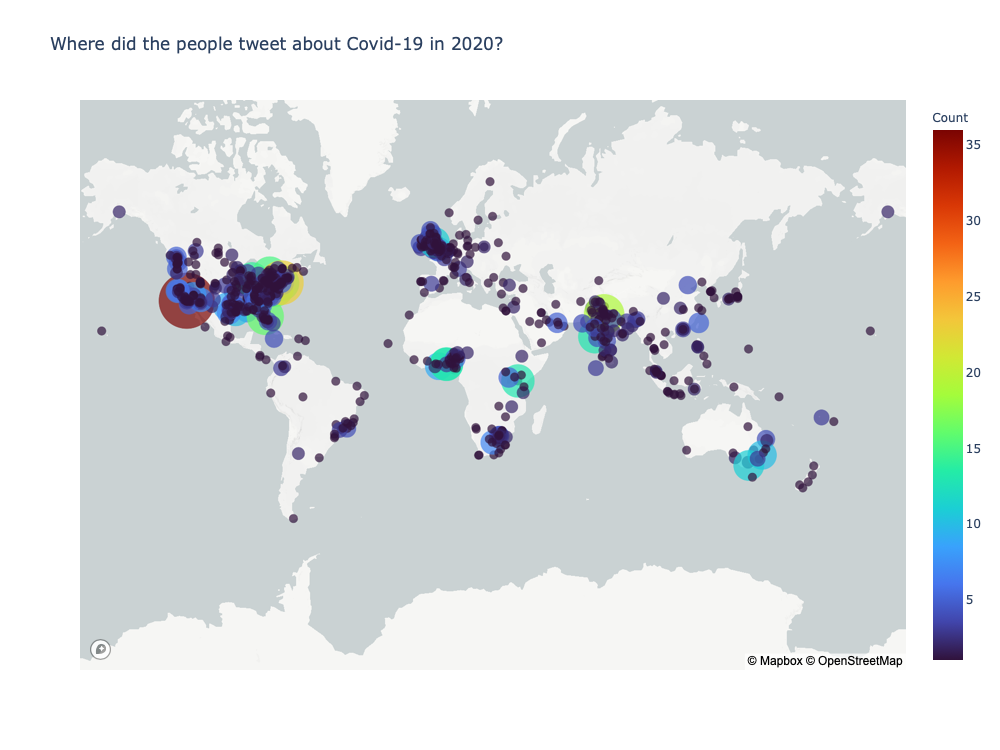

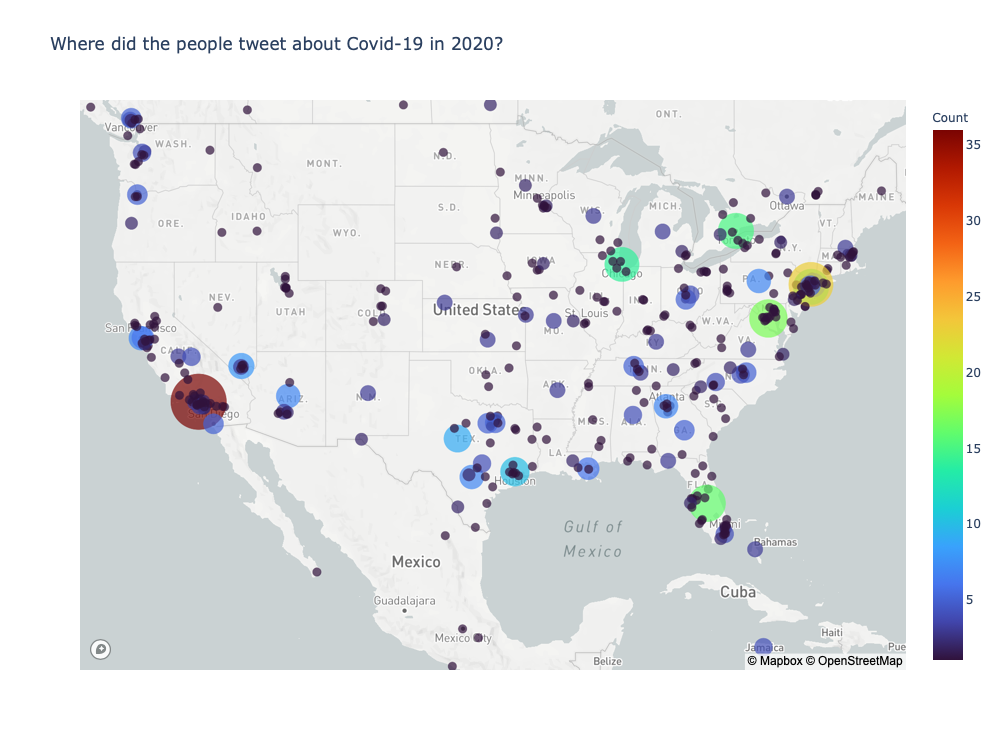

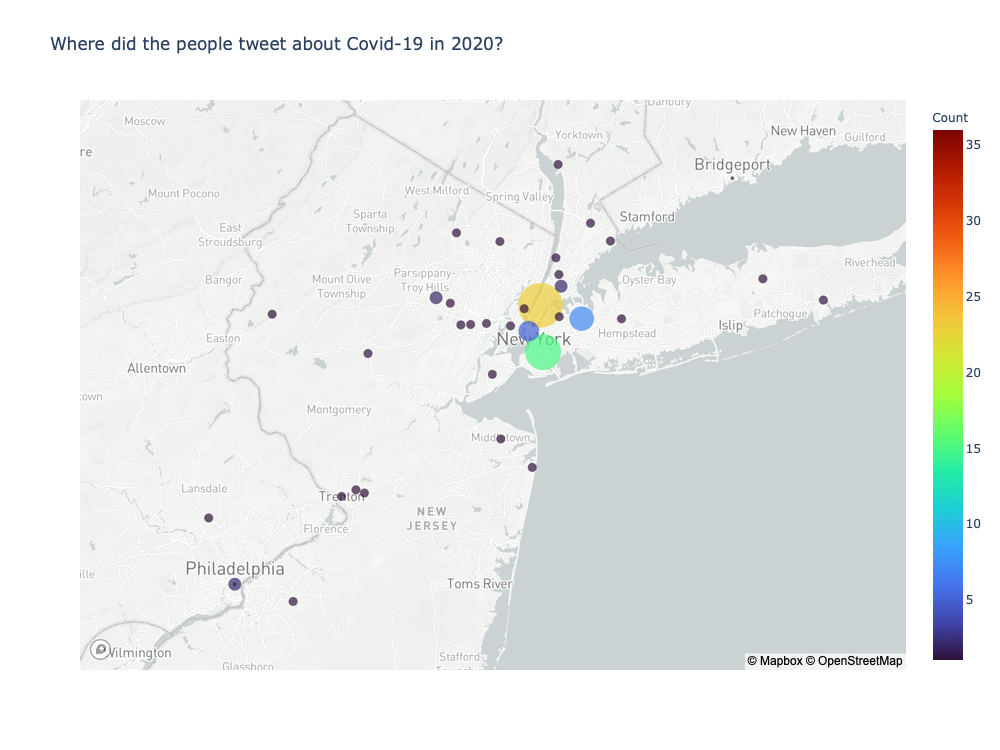